**Instructions**  
1. Run the whole notebook  and read the descriptions
2. Create new Maze objects of any h x w  
3. Have patience near the end as the loops can take a while to generate many mazes then time the algo performance  
5. If the plot style misbehaves, re_run the cell with the def plot_route to reset the style to default

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit, functools
import random
from numpy.random import choice

In [2]:
np.random.seed(37)

**Create Maze class**

In [3]:
class Maze():
    def __init__(self,h,w):
        self.h=h
        self.w=w
        self.distances=np.random.randint(10, size=(self.h, self.w))
        self.cost_dict=dict(np.ndenumerate(np.flip(self.distances, axis=0).T)) # dictionary with k=co_ordinate, v=distance
        self.co_ordinates = list(self.cost_dict.keys())#convert dictionary keys to a list that can be iterated over 
        self.neighbour_kys={} # dictionary of neighbouring co-ordinates for each co_ordinate
        for co_ord in self.co_ordinates:
            n_index=self.co_ordinates.index(co_ord)
            self.neighbour_kys[co_ord]=[self.co_ordinates[(n_index-1) % len(self.co_ordinates)], self.co_ordinates[(n_index+1) % len(self.co_ordinates)], self.co_ordinates[(n_index+h) % len(self.co_ordinates)], self.co_ordinates[(n_index-h) % len(self.co_ordinates)]]

        #note  self.neighbour_kys generates four 'neighbours' per co_ord even for edge cases, however only the valid ones are used by the algorithms
              

**Create a maze instance of any h,w (default is 5,5)**

In [4]:
my_maze=Maze(5,5)  

**Define heuristically guided algo**

In [5]:
def my_search_algo(maze_obj):
     #Make  neighbours easier to identify
    Down=0
    Up=1
    Right=2
    Left=3
    h=maze_obj.h
    w=maze_obj.w
    co_ordinates=maze_obj.co_ordinates
    neighbour_kys=maze_obj.neighbour_kys
    cost_dict=maze_obj.cost_dict
    current_node = (0,h-1)
    i=co_ordinates.index((0,h-1)) 
    route_list=[]
    while current_node !=(w-1,0):
        if current_node==(0,0):#bottom left corner
            neighbours=[neighbour_kys[co_ordinates[i]][Right]]
        elif current_node==(0,h-1):#top left corner
            neighbours=[neighbour_kys[co_ordinates[i]][Down], neighbour_kys[co_ordinates[i]][Right]]
        elif current_node==(w-1,h-1):#top right corner
            neighbours=[neighbour_kys[co_ordinates[i]][Down]] 
        elif current_node[0]==0: #left hand side
            neighbours=[neighbour_kys[co_ordinates[i]][Down],neighbour_kys[co_ordinates[i]][Right]]
        elif current_node[0]==w-1: #right hand side
            neighbours=[neighbour_kys[co_ordinates[i]][Down]]
        elif current_node[1]==0:#bottom side
            neighbours=[neighbour_kys[co_ordinates[i]][Right]] 
        elif current_node[1]==(h-1):#top side
            neighbours=[neighbour_kys[co_ordinates[i]][Right],neighbour_kys[co_ordinates[i]][Down]] 
        else:#centre node
            neighbours=[neighbour_kys[co_ordinates[i]][Down], neighbour_kys[co_ordinates[i]][Right]]

        #choose new node
        new_node_i_neighbours=[cost_dict[x] for x in neighbours].index(min([cost_dict[x] for x in neighbours]))
        route_list.append(current_node)
        current_node=(neighbours[new_node_i_neighbours])
        i=co_ordinates.index(current_node)
    if (maze_obj.w-1,0) not in route_list: #bit of debugging - sometimes the destination was not in the list
        route_list.append((maze_obj.w-1,0))
    return route_list

Run the first algo and return a path

In [6]:
my_search_route = my_search_algo(my_maze)

**Route plotting function**

In [7]:
def plot_route(maze_obj, search_algo_route_list):
    route_list=search_algo_route_list
    x_route_list = [item[0] for item in route_list]
    y_route_list = [item[1] for item in route_list]
    data = np.flipud(maze_obj.distances)
    plt.matshow(data, cmap='PuBu', alpha=0, origin='lower')
    plt.plot(x_route_list, y_route_list, alpha=0.5)
    plt.tick_params(axis='both', bottom=False, left=False, top=False, labelleft=False, labelbottom=False, labeltop=False)
    for (i, j), z in np.ndenumerate(data):
        plt.text(j, i, z, ha='center', va='center')
    route_list = tuple(tuple(x) for x in route_list)
    total_cost=[maze_obj.cost_dict[x] for x in route_list]
    total_cost=sum(total_cost)
    plt.title('\nTotal distance travelled is '+str(total_cost)+'\n', loc='left')
#     plt.title('Maze =' +str(maze_obj.h)+'x'+str(maze_obj.w)+'\n\nTotal distance travelled is '+str(total_cost)+'\n', loc='left')

**Algo timing function**

Ref: How to use timeit on func_args: https://stackoverflow.com/questions/5086430/how-to-pass-parameters-of-a-function-when-using-timeit-timer

In [8]:
t = timeit.Timer(functools.partial(my_search_algo, my_maze)) 
algo_name = my_search_algo.__name__
print(algo_name,'takes', t.timeit(10000), 'seconds to run 10000 times on the given maze')

my_search_algo takes 0.19233540000000016 seconds to run 10000 times on the given maze


**Route plotting function**

In [9]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

def plot_route(maze_obj, search_algo_route_list):
    route_list=search_algo_route_list
    x_route_list = [item[0] for item in route_list]
    y_route_list = [item[1] for item in route_list]
    data = np.flipud(maze_obj.distances)
    plt.matshow(data, cmap='PuBu', alpha=0, origin='lower')
    plt.plot(x_route_list, y_route_list, alpha=0.5)
    plt.tick_params(axis='both', bottom=False, left=False, top=False, labelleft=False, labelbottom=False, labeltop=False)
    for (i, j), z in np.ndenumerate(data):
        plt.text(j, i, z, ha='center', va='center')
    route_list = tuple(tuple(x) for x in route_list)
    total_cost=[maze_obj.cost_dict[x] for x in route_list]
    total_cost=sum(total_cost)
    plt.title('\nTotal distance travelled is '+str(total_cost)+'\n', loc='left')
#     plt.title('Maze =' +str(maze_obj.h)+'x'+str(maze_obj.w)+'\n\nTotal distance travelled is '+str(total_cost)+'\n', loc='left')

Plot my_search_route path and calculate distance

In [10]:
my_maze.distances

array([[5, 6, 3, 3, 5],
       [8, 5, 7, 8, 8],
       [3, 2, 8, 1, 8],
       [3, 8, 4, 1, 3],
       [2, 3, 3, 2, 9]])

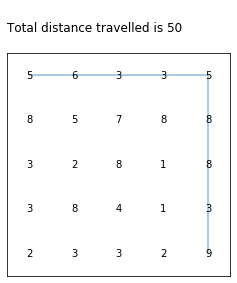

In [11]:
plot_route(my_maze, my_search_route)

**Dijkstra's algorithm**

In [12]:
def dijkstra(maze_obj):

    h=maze_obj.h
    w=maze_obj.w
    co_ordinates=maze_obj.co_ordinates
    neighbour_kys=maze_obj.neighbour_kys
    cost_dict=maze_obj.cost_dict
    
    #Create a set of all the unvisited nodes called the unvisited set.
    unvisited_set=set(list(cost_dict.keys()))

    #Set the destination node as current.
    start=(w-1,0)
    i=co_ordinates.index(start) #because it always starts in the top left
    current_node=co_ordinates[i] #the value of the co_ordiantes at index i pf co-ordinates 

    #Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes.
    inf=float('inf')
    min_distances_dict= {k:inf for (k,v) in cost_dict.items()}
    min_distances_dict[co_ordinates[i]]=cost_dict[(w-1,0)]

    route_list=[]#list of the route_taken, start at top left
    i_list=[]#same as route list but the indices thereof
    parent_child_nodes={}#dict of parent:child nodes
    child=None
    parent_child_nodes[co_ordinates[i]]=child
    previous_node=None

    #Make my neighbours easier to identify
    Down=0
    Up=1
    Right=2
    Left=3
    Vertical_Side=range(h-1)
    Horizontal_Side=range(w-1)

    while (0,h-1) in unvisited_set:


        route_list.append(current_node)

        if current_node==(0,0):#bottom left corner
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Right]]
        elif current_node==(0,h-1):#top left corner
            neighbours=[neighbour_kys[co_ordinates[i]][Down], neighbour_kys[co_ordinates[i]][Right]]
        elif current_node==(w-1,0):#bottom right corner
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Left]]
        elif current_node==(w-1,h-1):#top right corner
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Down]]   
        elif current_node[0]==0: #left hand side
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Down],neighbour_kys[co_ordinates[i]][Right]]
        elif current_node[0]==w-1: #right hand side
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Down],neighbour_kys[co_ordinates[i]][Left]]
        elif current_node[1]==0:#bottom side
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Right],neighbour_kys[co_ordinates[i]][Up]] 
        elif current_node[1]==(h-1):#top side
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Right],neighbour_kys[co_ordinates[i]][Down]] 
        else:#centre node
            neighbours=neighbour_kys[co_ordinates[i]]

        previous_neighbours=None
        if previous_node != None:
            p_index=co_ordinates.index(previous_node)
            if previous_node==(0,0):#bottom left corner
                previous_neighbours=[neighbour_kys[co_ordinates[p_index]][Up], neighbour_kys[co_ordinates[p_index]][Right]]
            elif previous_node==(0,h-1):#top left corner
                previous_neighbours=[neighbour_kys[co_ordinates[p_index]][Down], neighbour_kys[co_ordinates[p_index]][Right]]
            elif previous_node==(w-1,0):#bottom right corner
                previous_neighbours=[neighbour_kys[co_ordinates[p_index]][Up], neighbour_kys[co_ordinates[p_index]][Left]]
            elif previous_node==(w-1,h-1):#top right corner
                previous_neighbours=[neighbour_kys[co_ordinates[p_index]][Left], neighbour_kys[co_ordinates[p_index]][Down]]   
            elif previous_node[0]==0: #left hand side
                previous_neighbours=[neighbour_kys[co_ordinates[p_index]][Up], neighbour_kys[co_ordinates[p_index]][Down],neighbour_kys[co_ordinates[p_index]][Right]]
            elif previous_node[0]==w-1: #right hand side
                previous_neighbours=[neighbour_kys[co_ordinates[p_index]][Up], neighbour_kys[co_ordinates[p_index]][Down],neighbour_kys[co_ordinates[p_index]][Left]]
            elif previous_node[1]==0:#bottom side
                previous_neighbours=[neighbour_kys[co_ordinates[p_index]][Left], neighbour_kys[co_ordinates[p_index]][Right],neighbour_kys[co_ordinates[p_index]][Up]] 
            elif previous_node[1]==(h-1):#top side
                previous_neighbours=[neighbour_kys[co_ordinates[p_index]][Left], neighbour_kys[co_ordinates[p_index]][Right],neighbour_kys[co_ordinates[p_index]][Down]] 
            else:#centre node
                previous_neighbours=neighbour_kys[co_ordinates[p_index]]

          #if the destination node is adjacent, stop
        if (0,h-1) in neighbours:
            route_list.append((0,h-1))
            break
        #only consider unvisited neighbours 
        neighbours = [tuple(l) for l in neighbours]#convert to tuple to perform set operation
        neighbours=list((set(tuple(neighbours)).intersection(unvisited_set)))

        #define the current parent distance to which a child distance is added
        parent_distance=min_distances_dict[current_node]

        #calculate neighbours tentative distances through[from?] the current node
        neighbours = [tuple(l) for l in neighbours]#convert to tuple to perform dict operation
        neighbour_distances=[cost_dict[x] for x in neighbours]#create dict of neighbours
        neighbour_dict = {neighbours[v]: (neighbour_distances[v]+parent_distance) for v in range(len(neighbours))} 

        #Compare the newly calculated tentative distance to the current assigned value and assign the smaller one.
        for k in neighbours:#THIS IS THE ONE YOU WANT
            if min_distances_dict[k] > neighbour_dict[k]:
                min_distances_dict[k]=neighbour_dict[k]

        #mark the current node as visited and remove it from the unvisited set. 
        unvisited_set.discard((tuple(current_node)))

        #select the unvisited node that is marked with the smallest tentative CUMULATIVE!! distance, 

        min_distances_dict_without_current_node= min_distances_dict.copy()#make a copy otherwise you get inter dict weirdness
        for stop in route_list:
            del min_distances_dict_without_current_node[stop]#define this so it doesn't just sit on its arse or oscillate
        previous_node=current_node#records the current node as previous node for the parent:child dict


        #if the destination node is adjacent, stop
        if (0,h-1) in neighbours:
            route_list.append((0,h-1))
            break

        #add previous neighbours to neighbours if previous neighbours not in unvisited_set
        if previous_neighbours !=None:
            previous_neighbours = [tuple(l) for l in previous_neighbours]#convert to tuple to perform set operation
            previous_neighbours=list((set(tuple(previous_neighbours)).intersection(unvisited_set)))
            neighbours_previous_neighbours_union = list((set(tuple(previous_neighbours)).union((set(tuple(neighbours))))))

        #sets the new current node - see line one re min_distances_dict_without_current_node
        if previous_neighbours !=None:
            min_distances_dict_without_current_node_neighbours_only = {k: min_distances_dict_without_current_node[k] for k in neighbours_previous_neighbours_union}
        else:
            min_distances_dict_without_current_node_neighbours_only = {k: min_distances_dict_without_current_node[k] for k in neighbours}
        if min_distances_dict_without_current_node_neighbours_only !={}:
            current_node= tuple(min(min_distances_dict_without_current_node_neighbours_only, key=min_distances_dict_without_current_node_neighbours_only.get))
        else: 
            unvisited_set.discard((h-1,0))
            min_distances_dict_exception={k: min_distances_dict[k] for k in list(unvisited_set)}
            current_node=tuple(min(min_distances_dict_exception, key=min_distances_dict_exception.get))
        i=co_ordinates.index(current_node)      
        i_list.append(i)
        parent_child_nodes[previous_node]=current_node#sets the current node as the child of the previous node
    current_node = (0,h-1)
    i=co_ordinates.index((0,h-1)) 
    true_route_list=[(0,h-1)]
    unvisited_set=set(list(cost_dict.keys()))
    while current_node !=(start):
        if current_node==(0,0):#bottom left corner
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Right]]
        elif current_node==(0,h-1):#top left corner
            neighbours=[neighbour_kys[co_ordinates[i]][Down], neighbour_kys[co_ordinates[i]][Right]]
        elif current_node==(w-1,0):#bottom right corner
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Left]]
        elif current_node==(w-1,h-1):#top right corner
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Down]] 
        elif current_node[0]==0: #left hand side
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Down],neighbour_kys[co_ordinates[i]][Right]]
        elif current_node[0]==w-1: #right hand side
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Down],neighbour_kys[co_ordinates[i]][Left]]
        elif current_node[1]==0:#bottom side
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Right],neighbour_kys[co_ordinates[i]][Up]] 
        elif current_node[1]==(h-1):#top side
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Right],neighbour_kys[co_ordinates[i]][Down]] 
        else:#centre node
            neighbours=neighbour_kys[co_ordinates[i]]
        unvisited_set.discard((tuple(current_node)))
        unvisited_neighbours=list((set(tuple(neighbours)).intersection(unvisited_set)))
        min_distances_dict_this_round = {k: min_distances_dict[k] for k in unvisited_neighbours}
        new_node=tuple(min(min_distances_dict_this_round, key=min_distances_dict_this_round.get))
        true_route_list.append(new_node)
        current_node=new_node
        i=co_ordinates.index(current_node)
    if (w-1,0) not in true_route_list:
        true_route_list.append((w-1,0))
    return true_route_list

Run the dijkstra algo

In [13]:
dijkstra_route = dijkstra(my_maze)

In [14]:
my_maze.distances

array([[5, 6, 3, 3, 5],
       [8, 5, 7, 8, 8],
       [3, 2, 8, 1, 8],
       [3, 8, 4, 1, 3],
       [2, 3, 3, 2, 9]])

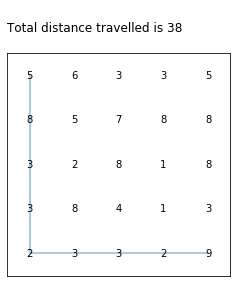

In [15]:
plot_route(my_maze, dijkstra_route)

Time the algo

In [16]:
t = timeit.Timer(functools.partial(dijkstra, my_maze)) 
algo_name = dijkstra.__name__
print(algo_name,'takes', t.timeit(10000), 'seconds to run 10000 times on the given maze')

dijkstra takes 2.9325996999999995 seconds to run 10000 times on the given maze


Demonstrate that it will perform on any size and shape

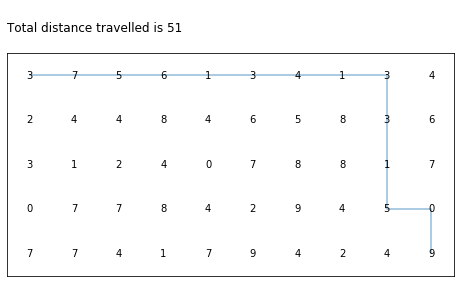

In [17]:
rectangular_maze=Maze(5,10)
rec_dijkstra=dijkstra(rectangular_maze)
plot_route(rectangular_maze, rec_dijkstra)

**Ant Colony Optimisation**  

Six different functions are required:

First, create an initial path

In [18]:
def initial_path(maze_obj):
    
    h=maze_obj.h
    w=maze_obj.w
    co_ordinates=maze_obj.co_ordinates
    neighbour_kys=maze_obj.neighbour_kys
    cost_dict=maze_obj.cost_dict
    
    
    #Make my neighbours easier to identify
    Down=0
    Up=1
    Right=2
    Left=3
    
    #Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes.
    inf=float('inf')

    #Set the start node as current.
    start=(0,h-1)
    i=co_ordinates.index(start) #because it always starts in the top left
    min_distances_dict= {k:inf for (k,v) in cost_dict.items()}
    min_distances_dict[co_ordinates[i]]=cost_dict[(w-1,0)]
    current_node=co_ordinates[i] #the value of the co_ordiantes at index i pf co-ordinates 
    route_list=[]#list of the route_taken, start at top left     
    unvisited_set=set(list(cost_dict.keys()))

    while (w-1,0) in unvisited_set:

        if current_node==(0,0):#bottom left corner
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Right]]
        elif current_node==(0,h-1):#top left corner
            neighbours=[neighbour_kys[co_ordinates[i]][Down], neighbour_kys[co_ordinates[i]][Right]]
        elif current_node==(w-1,0):#bottom right corner
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Left]]
        elif current_node==(w-1,h-1):#top right corner
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Down]]   
        elif current_node[0]==0: #left hand side
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Down],neighbour_kys[co_ordinates[i]][Right]]
        elif current_node[0]==w-1: #right hand side
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Down],neighbour_kys[co_ordinates[i]][Left]]
        elif current_node[1]==0:#bottom side
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Right],neighbour_kys[co_ordinates[i]][Up]] 
        elif current_node[1]==(h-1):#top side
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Right],neighbour_kys[co_ordinates[i]][Down]] 
        else:#centre node
            neighbours=neighbour_kys[co_ordinates[i]]

         #if the destination node is adjacent, stop
        if (w-1,0) in neighbours:
            route_list.append(current_node)
            route_list.append((w-1,0))
            break

        #mark the current node as visited
        unvisited_set.discard((tuple(current_node)))

        #only consider unvisited neighbours 
        neighbours = [tuple(l) for l in neighbours]#convert to tuple to perform set operation
        neighbours=list((set(tuple(neighbours)).intersection(unvisited_set)))

        #sets the new current node randomly
        if neighbours==[]:
            current_node=co_ordinates[co_ordinates.index(start)]
            unvisited_set=set(list(cost_dict.keys()))
            route_list=[]
            i=co_ordinates.index(current_node)
            continue
        else:
            route_list.append(current_node)
            new_node=random.choice(neighbours)
            current_node=new_node
            i=co_ordinates.index(current_node)      
    return route_list

Calculate the distance of any given route in any given maze

In [19]:
def calc_route_distance(maze_obj, route_list):
    route_list = tuple(tuple(x) for x in route_list)
    total_cost=[maze_obj.cost_dict[x] for x in route_list]
    total_cost=sum(total_cost)
    return total_cost

Update pheromone levels

In [20]:
def pheromone_update(maze_obj, ant_path, pheromone_dict):
    dilution_factor=calc_route_distance(maze_obj, ant_path)
    for co_ord in ant_path:
        pheromone_dict[co_ord]+=maze_obj.w+maze_obj.h/(10*dilution_factor)
    return pheromone_dict

Evapourate pheromone levels, specifying a rate

In [21]:
def evapourate(maze_obj, ant_path, pheromone_dict, rate):
    dilution_factor=calc_route_distance(maze_obj, ant_path)
    for co_ord in pheromone_dict.keys():
        pheromone_dict[co_ord]-=rate*dilution_factor
    #ensure that pheromone levels cannot drop below a certain threshold, to avoid zeros/-ve scents
    for k, v in pheromone_dict.items():
        if v < 0.1:
            pheromone_dict[k] = 0.01
    return pheromone_dict

The main Ant Colony Optimisation algo brings these functions together (including the longer 'choose_path' below, for a specified population of ants.  
It returns a final ant_path (and also the pheromone_dict, cost_history for debugging purposes)

In [22]:
def ACO(maze_obj, population):
    pheromone_dict = dict.fromkeys(maze_obj.cost_dict, 0.1) # instantiates pheromone_dict
    ant_path=initial_path(maze_obj)#sets initial path
    print ('initial path=', ant_path)
    cost_history=[]
    for ant in range(population):
        pheromone_dict=pheromone_update(maze_obj, ant_path, pheromone_dict) # updates pheromone_dict
        pheromone_dict=evapourate(maze_obj, ant_path, pheromone_dict, rate=0.05) # updates pheromone_dict
        ant_path = choose_path(maze_obj, pheromone_dict)
        cost = calc_route_distance(maze_obj, ant_path)
        cost_history.append(cost)#keep a record of the distance 'cost' of each route  -it ought to go down
    print ('final path=', ant_path)
    return ant_path, pheromone_dict, cost_history

The 'choose_path' function below is the main engine of ACO - it uses the random choice function to make a weighted random choice between next steps, with reference to the pheromone_dict values of the avaiable neighbouring locations (which is updated for every ant in the ACO function.)

In [23]:
def choose_path(maze_obj, pheromone_dict):
    
    h=maze_obj.h
    w=maze_obj.w
    co_ordinates=maze_obj.co_ordinates
    neighbour_kys=maze_obj.neighbour_kys
    cost_dict=maze_obj.cost_dict
    
    
    #Make my neighbours easier to identify
    Down=0
    Up=1
    Right=2
    Left=3
    
    #Set the destination node as current.
    start=(0,h-1)
    i=co_ordinates.index(start) #because it always starts in the top left
    current_node=co_ordinates[i] #the value of the co_ordiantes at index i pf co-ordinates 
    route_list=[]#list of the route_taken, start at top left     
    unvisited_set=set(list(cost_dict.keys()))
    
    while (w-1,0) in unvisited_set:

        if current_node==(0,0):#bottom left corner
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Right]]
        elif current_node==(0,h-1):#top left corner
            neighbours=[neighbour_kys[co_ordinates[i]][Down], neighbour_kys[co_ordinates[i]][Right]]
        elif current_node==(w-1,0):#bottom right corner
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Left]]
        elif current_node==(w-1,h-1):#top right corner
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Down]]   
        elif current_node[0]==0: #left hand side
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Down],neighbour_kys[co_ordinates[i]][Right]]
        elif current_node[0]==w-1: #right hand side
            neighbours=[neighbour_kys[co_ordinates[i]][Up], neighbour_kys[co_ordinates[i]][Down],neighbour_kys[co_ordinates[i]][Left]]
        elif current_node[1]==0:#bottom side
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Right],neighbour_kys[co_ordinates[i]][Up]] 
        elif current_node[1]==(h-1):#top side
            neighbours=[neighbour_kys[co_ordinates[i]][Left], neighbour_kys[co_ordinates[i]][Right],neighbour_kys[co_ordinates[i]][Down]] 
        else:#centre node
            neighbours=neighbour_kys[co_ordinates[i]]
        
         #if the destination node is adjacent, stop
        if (w-1,0) in neighbours:
            route_list.append(current_node)
            route_list.append((w-1,0))
            break
        
        #mark the current node as visited
        unvisited_set.discard((tuple(current_node)))
        
        neighbours = [tuple(l) for l in neighbours]#convert to tuple to perform set operation
        neighbours=list((set(tuple(neighbours)).intersection(unvisited_set)))
        
        if neighbours==[]:
            current_node=co_ordinates[co_ordinates.index(start)]
            unvisited_set=set(list(cost_dict.keys()))
            route_list=[]
            i=co_ordinates.index(current_node)
            continue
        else:

            
            i_neighbours=[]
            for n in neighbours:
                i_neighbours.append(co_ordinates.index(n))
            neighbour_scents=[pheromone_dict[x] for x in neighbours]
            new_node_i = choice(i_neighbours, 1, neighbour_scents)  # random_choice weighted by the pheromones
            new_node = co_ordinates[int(new_node_i)]
            route_list.append(current_node)
            current_node=new_node

        i=co_ordinates.index(current_node)      
    return route_list

Run the ACO algo with a population of 1000

In [24]:
ant_path, pheromone_dict, cost_history = ACO(my_maze, 1000)

initial path= [(0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 3), (3, 3), (2, 3), (2, 2), (3, 2), (3, 1), (4, 1), (4, 0)]
final path= [(0, 4), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4), (4, 3), (3, 3), (3, 2), (3, 1), (4, 1), (4, 0)]


Plot the final path - there is an unidentied bug - it has not optimised for an unknown reason   
When run step by step the code does as intended but brought together it does not

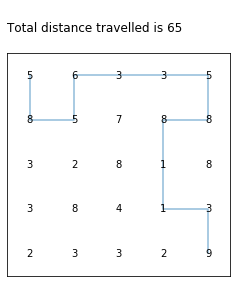

In [25]:
plot_route(my_maze, ant_path)

The distance cost of successive ant paths is random instead of steadily coming down - there is an unidentied bug

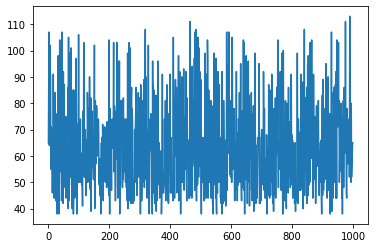

In [26]:
plt.plot(cost_history)

Show that the pheromone_dict is being update as intended - why is the weighting not having the desired effect on making more and more optimal path choices?

In [27]:
pheromone_dict

{(0, 0): 1.8178124999999996,
 (0, 1): 1.8178124999999996,
 (0, 2): 1.8178124999999996,
 (0, 3): 1.8178124999999996,
 (0, 4): 1844.1397846251514,
 (1, 0): 1.8178124999999996,
 (1, 1): 1.8178124999999996,
 (1, 2): 1.8178124999999996,
 (1, 3): 139.48165656506288,
 (1, 4): 181.08648561221057,
 (2, 0): 1.8178124999999996,
 (2, 1): 1.8178124999999996,
 (2, 2): 0.01,
 (2, 3): 3.45903402398236,
 (2, 4): 1.127565485362095,
 (3, 0): 1.8178124999999996,
 (3, 1): 1.8178124999999996,
 (3, 2): 3.5371808699774796,
 (3, 3): 0.01,
 (3, 4): 0.01,
 (4, 0): 1844.1397846251514,
 (4, 1): 7.053430869977482,
 (4, 2): 7.053430869977482,
 (4, 3): 0.01,
 (4, 4): 0.01}

Create a range of mazes of increasing size and compare the time taken to solve with different algorithms and the difference in accuracy measured by the which algo delivers a shorter path

In [28]:
maze_list=[]
for n in range(3,30):#start at 3 because the minimum viable maze is 3x3
    maze_list.append(Maze(n,n))  

In [29]:
my_search_algo_timings=[]
dijkstra_timings=[]
for maze in range(len(maze_list)):
    msa = timeit.Timer(functools.partial(my_search_algo, maze_list[maze])) 
    d = timeit.Timer(functools.partial(dijkstra, maze_list[maze])) 
    my_search_algo_timings.append(msa.timeit(100))
    dijkstra_timings.append(d.timeit(100))

In [30]:
accuracy_difference = []
my_search_algo_routes = []
dijkstra_routes = []
mse_cost_list=[]
d_cost_list=[]
for maze in range(len(maze_list)):
    mse_route = my_search_algo(maze_list[maze])
    d_route = my_search_algo(maze_list[maze])
    my_search_algo_routes.append(mse_route)
    dijkstra_routes.append(d_route)
    mse_cost = calc_route_distance(maze_list[maze], mse_route)
    d_cost = calc_route_distance(maze_list[maze], d_route)
    mse_cost_list.append(mse_cost)
    d_cost_list.append(d_cost)
    accuracy_difference.append(mse_cost-d_cost)

Text(0.5, 1.0, 'Heuristics decrease computational cost!\n')

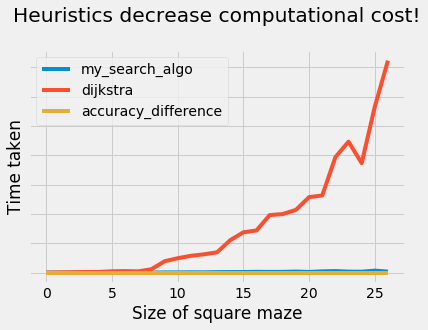

In [31]:
plt.style.use('fivethirtyeight') 
plt.plot(my_search_algo_timings, label='my_search_algo')
plt.plot(dijkstra_timings, label='dijkstra')
plt.plot(accuracy_difference, label='accuracy_difference')
plt.xlabel('Size of square maze')
plt.tick_params(axis='y', left=False, labelleft=False)
plt.ylabel('Time taken')
plt.legend()
plt.title('Heuristics decrease computational cost!\n')

Plot a number of mazes and routes together to show how the two algos virtually always deliver the same result.  

Occassionally it is different for a smaller maze, where the initial choice makes a difference (but not in these particular examples  - see the original my_maze 5x5 above)

Note the plots are in pairs  - the my_search_algo solution is printed first then the dijkstra solution.

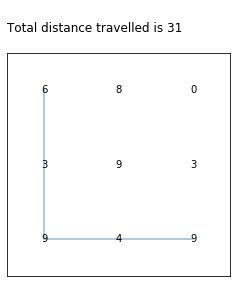

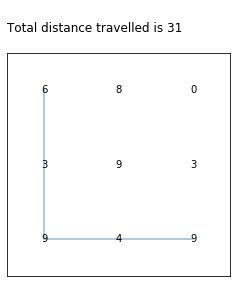

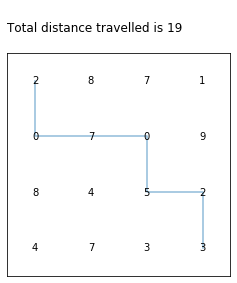

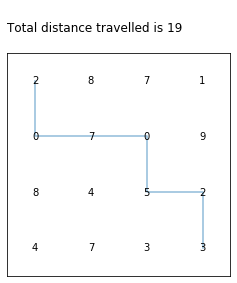

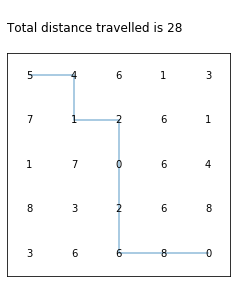

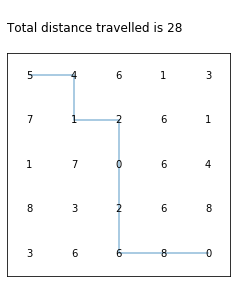

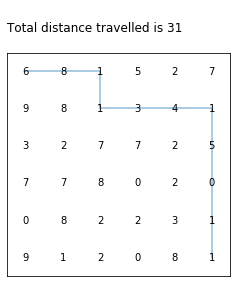

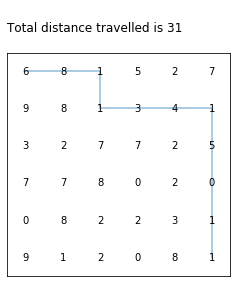

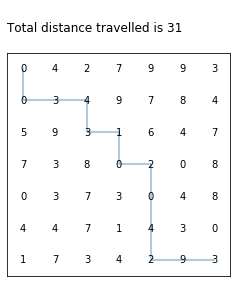

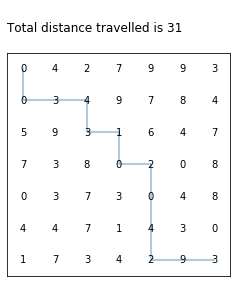

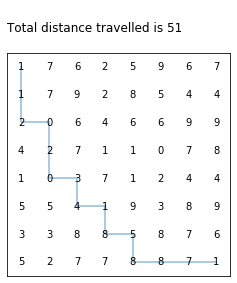

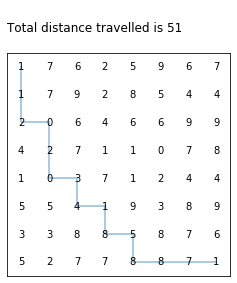

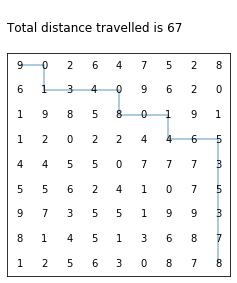

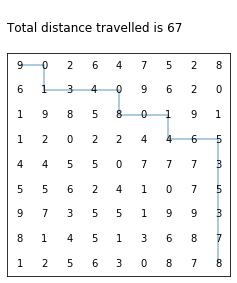

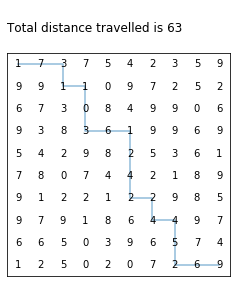

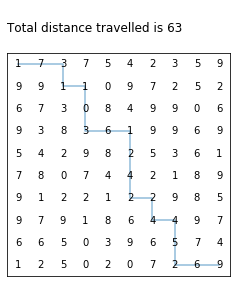

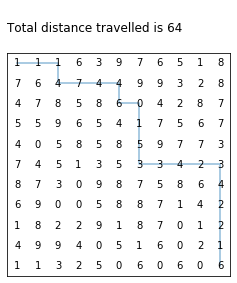

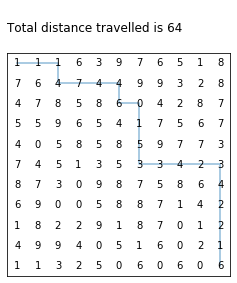

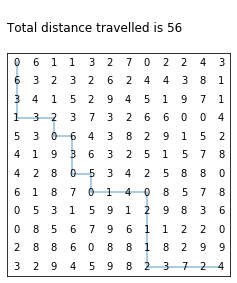

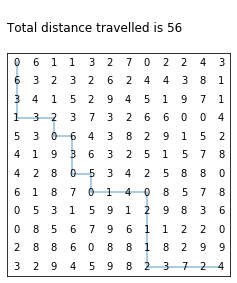

In [32]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
for maze, mse_route, dijkstra_route in zip(range(10), my_search_algo_routes, dijkstra_routes):

    plot_route(maze_list[maze], mse_route)
    plot_route(maze_list[maze], dijkstra_route)